# Procesamiento de imagenes morfológicas
La morfología matemática es el área del procesamiento de imagágenes que se usa para representar, describir, y analizar formas en imagénes.

El principio básico de la morfoología matemática es obtener/extraer información geométrica o topoloógica de una imágen, a traves de transformaciones, utilizando elementos estructurales.

Para eso, trabajaremos con imagenes binarias, es decir, toma valores de: 0,1 (normalizado), 0,255 (8-bit)

    Los valores pueden no ser exactamente 0 ó 1, debido a la compresión
    


In [28]:
clc;clear;
function Y = binaria(X)
    Y = zeros(size(X));
    ind_blanco = (X>= 0.5);
    %ind_negro = (X < 0.5); % No hace falta
    Y(ind_blanco) = 1;
    %Y(ind_negro) = 0; %=> No hace falta, ya que la matriz original es una matriz de ceros
endfunction

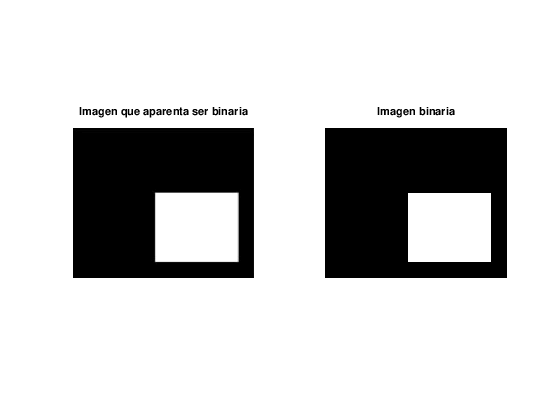

In [29]:
pkg load image
A = imread('Images/imagen2.jpg');
subplot(1,2,1);
imshow(A);
title("Imagen que aparenta ser binaria")

subplot(1,2,2);
A = im2double(A);
B =binaria(A);
imshow(B);
title("Imagen binaria")

## Conceptos fundamentales
Sea $A$ una imagen binaria, Sea $z = (x,y) \in A$, donde $(x,y)$ representa la posicion de un pixel en la imagen A

### Operaciones
1. **Complemento de $A$**: $A^c=\{(x,y)/(x,y) \not\in A\}$
1. **Unión de $A$ y $B$:** $A\cup B = \{(x,y)/(x,y) \in A \vee  (x,y) \in B\}$
1. **Intersección de $A$ y $B$:** $A\cap B = \{(x,y)/(x,y) \in A \wedge  (x,y) \in B\}$
1. **Diferencia de $A$ y $B$:** $A-B = \{ (x,y)/(x,y) \in A \wedge (x,y) \not \in B \}$
1. **Traslación de A por un punto $w=(\bar x, \bar y)$:**$A_w = \{ c= (x,y)/c=z+w, z\in A \}$
1. **Reflexión:** Es el conjunto relacionado al origen de un sistema de coorddenadas y se define como: $\hat A = \{ z=(x,y)/z=-a, a\in A \}$

#### ¿Cómo hacer las operaciones anteriores en Octave?

|**Operación**|**GNU Octave**|
|-|-|
|$A\cap B$|A & B|
|$A\cup B$|A \| B|
|$A^c$ | ~A|
|$A - B$|A &~ B|

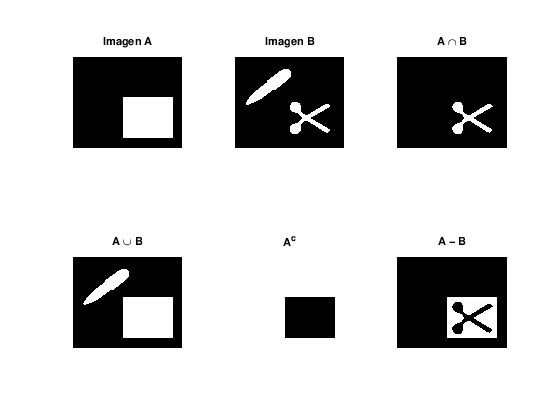

In [33]:
pkg load image
A = imread('Images/imagen2.jpg');
subplot(2,3,1);
A = im2double(A);
A =binaria(A);
imshow(A);
title('Imagen A')

B = imread('Images/imagen3.jpg');
subplot(2,3,2);
B = im2double(B);
B =binaria(B);
imshow(B);
title('Imagen B')

% Intersección
O1 = A&B;
subplot(2,3,3);
imshow(O1);
title('A \cap B')

% Union
O2 = A|B;
subplot(2,3,4);
imshow(O2);
title('A \cup B')

% Complemento
O3 = ~A;
subplot(2,3,5);
imshow(O3);
title('A^c')

% Diferencia
O4 = A&~B;
subplot(2,3,6);
imshow(O4);
title('A - B')

## Operación de Dilatación
Es una operación que hace crecer o engrosar un objeto en una imagen.

Matemáticamente, la dilatación de A y B se denota $A\oplus B$ y se defina como el conjunto 
$$A \oplus B= \{ z=(x,y)/(\hat B)_z \cap A \not = \not O \}$$

donde B es una matriz simétrica.

Para definir esta operación de una menera más intuitiva, definiremos el centro de una imagen.

* **Origen o centro:** Sea $B \in {\rm I\!R}^{m\times n}$, entonces el centro/origen de B se define como el par ordenado
$$ (\bar x, \bar y) = \left( \left[\frac{m+1}{2}\right], \left[\frac{n+1}{2}\right] \right) $$
donde $[w]$ es truncar el valor de $w$.

**Ejemplo:** Sea $B \in {\rm I\!R}^{2\times 2}$, entonces
$$ (\bar x, \bar y) = \left( \left[\frac{2+1}{2}\right], \left[\frac{2+1}{2}\right] \right) = ([1.5], [1.5]) = (1,1)$$

El proceso de dilatación se puede obtener de la siguiente forma:

Para cada pixel en $A$, que tenga el valor de 1, se superpone la matriz $B$ en el centro y todos los pixeles que abarque la matriz $B$ toman el valor de 1.

**Ejm: Considere las matrices:**
$$A = \left( \right)$$